<a href="https://colab.research.google.com/github/usama15/Tensorflow-Q3/blob/master/ch5_pretrained_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16

In [2]:
conv_base = VGG16(weights='imagenet',
include_top=False,
input_shape=(150, 150, 3))

58892288/58889256 [==============================] - 1s 0us/step


In [3]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [4]:
!pwd
!unzip "drive/My Drive/Tensorflow/dogs-vs-cats.zip" 
!unzip train.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/dog.55.jpg        
  inflating: train/dog.550.jpg       
  inflating: train/dog.5500.jpg      
  inflating: train/dog.5501.jpg      
  inflating: train/dog.5502.jpg      
  inflating: train/dog.5503.jpg      
  inflating: train/dog.5504.jpg      
  inflating: train/dog.5505.jpg      
  inflating: train/dog.5506.jpg      
  inflating: train/dog.5507.jpg      
  inflating: train/dog.5508.jpg      
  inflating: train/dog.5509.jpg      
  inflating: train/dog.551.jpg       
  inflating: train/dog.5510.jpg      
  inflating: train/dog.5511.jpg      
  inflating: train/dog.5512.jpg      
  inflating: train/dog.5513.jpg      
  inflating: train/dog.5514.jpg      
  inflating: train/dog.5515.jpg      
  inflating: train/dog.5516.jpg      
  inflating: train/dog.5517.jpg      
  inflating: train/dog.5518.jpg      
  inflating: train/dog.5519.jpg      
  inflating: train/dog.552.jpg       
  inflating: train/dog.5520.jpg      

In [0]:
!mkdir source_data

In [0]:
!mv train source_data

In [0]:
!rm -Rf cats_and_dogs_small

In [0]:
import os, shutil
def createIfNot(pathName):
    if os.path.exists(pathName):
        print(pathName, " Already Exists")
    else:
        os.mkdir(pathName)

original_dataset_dir = 'source_data/train'

modelStoragePath = "drive/My Drive/"

base_dir = 'cats_and_dogs_small'
createIfNot(base_dir)
train_dir = os.path.join(base_dir, 'train')
createIfNot(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
createIfNot(validation_dir)
test_dir = os.path.join(base_dir, 'test')
createIfNot(test_dir)
train_cats_dir = os.path.join(train_dir, 'cats')
createIfNot(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
createIfNot(train_dogs_dir)
validation_cats_dir = os.path.join(validation_dir, 'cats')
createIfNot(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
createIfNot(validation_dogs_dir)
test_cats_dir = os.path.join(test_dir, 'cats')
createIfNot(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
createIfNot(test_dogs_dir)

In [9]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
print(fnames[1], fnames[10])

for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    print(src)
    dst = os.path.join(train_cats_dir, fname)
    print(dst)
    shutil.copyfile(src, dst)

cat.1.jpg cat.10.jpg
source_data/train/cat.0.jpg
cats_and_dogs_small/train/cats/cat.0.jpg
source_data/train/cat.1.jpg
cats_and_dogs_small/train/cats/cat.1.jpg
source_data/train/cat.2.jpg
cats_and_dogs_small/train/cats/cat.2.jpg
source_data/train/cat.3.jpg
cats_and_dogs_small/train/cats/cat.3.jpg
source_data/train/cat.4.jpg
cats_and_dogs_small/train/cats/cat.4.jpg
source_data/train/cat.5.jpg
cats_and_dogs_small/train/cats/cat.5.jpg
source_data/train/cat.6.jpg
cats_and_dogs_small/train/cats/cat.6.jpg
source_data/train/cat.7.jpg
cats_and_dogs_small/train/cats/cat.7.jpg
source_data/train/cat.8.jpg
cats_and_dogs_small/train/cats/cat.8.jpg
source_data/train/cat.9.jpg
cats_and_dogs_small/train/cats/cat.9.jpg
source_data/train/cat.10.jpg
cats_and_dogs_small/train/cats/cat.10.jpg
source_data/train/cat.11.jpg
cats_and_dogs_small/train/cats/cat.11.jpg
source_data/train/cat.12.jpg
cats_and_dogs_small/train/cats/cat.12.jpg
source_data/train/cat.13.jpg
cats_and_dogs_small/train/cats/cat.13.jpg
sourc

In [10]:
!ls cats_and_dogs_small/train/cats

cat.0.jpg    cat.250.jpg  cat.400.jpg  cat.551.jpg  cat.701.jpg  cat.852.jpg
cat.100.jpg  cat.251.jpg  cat.401.jpg  cat.552.jpg  cat.702.jpg  cat.853.jpg
cat.101.jpg  cat.252.jpg  cat.402.jpg  cat.553.jpg  cat.703.jpg  cat.854.jpg
cat.102.jpg  cat.253.jpg  cat.403.jpg  cat.554.jpg  cat.704.jpg  cat.855.jpg
cat.103.jpg  cat.254.jpg  cat.404.jpg  cat.555.jpg  cat.705.jpg  cat.856.jpg
cat.104.jpg  cat.255.jpg  cat.405.jpg  cat.556.jpg  cat.706.jpg  cat.857.jpg
cat.105.jpg  cat.256.jpg  cat.406.jpg  cat.557.jpg  cat.707.jpg  cat.858.jpg
cat.106.jpg  cat.257.jpg  cat.407.jpg  cat.558.jpg  cat.708.jpg  cat.859.jpg
cat.107.jpg  cat.258.jpg  cat.408.jpg  cat.559.jpg  cat.709.jpg  cat.85.jpg
cat.108.jpg  cat.259.jpg  cat.409.jpg  cat.55.jpg   cat.70.jpg	 cat.860.jpg
cat.109.jpg  cat.25.jpg   cat.40.jpg   cat.560.jpg  cat.710.jpg  cat.861.jpg
cat.10.jpg   cat.260.jpg  cat.410.jpg  cat.561.jpg  cat.711.jpg  cat.862.jpg
cat.110.jpg  cat.261.jpg  cat.411.jpg  cat.562.jpg  cat.712.jpg  cat.863.jpg
c

In [0]:
#getting 500 cats pictures for testing
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

In [0]:
#getting 500 pictures for validation
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

In [0]:
#getting 1000 dogs pics for traing
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

#getting 500 dogs pics for testing
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

##getting 500 dogs pics for validation
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [14]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

base_dir = './cats_and_dogs_small'
print(base_dir)
train_dir = os.path.join(base_dir, 'train')
print(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
                    directory,
                    target_size=(150, 150),
                    batch_size=batch_size,
                    class_mode='binary')
    
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels
      

./cats_and_dogs_small
./cats_and_dogs_small/train


In [15]:
train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
train_features = np.reshape(train_features, (2000, 4*4* 512))
validation_features = np.reshape(validation_features, (1000, 4*4* 512))
test_features = np.reshape(test_features, (1000, 4*4* 512))

In [17]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Using TensorFlow backend.


Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 1s 334us/step - loss: 0.6188 - acc: 0.6620 - val_loss: 0.4559 - val_acc: 0.8350
Epoch 2/30
2000/2000 [==============================] - 0s 217us/step - loss: 0.4293 - acc: 0.8015 - val_loss: 0.3689 - val_acc: 0.8660
Epoch 3/30
2000/2000 [==============================] - 0s 217us/step - loss: 0.3627 - acc: 0.8485 - val_loss: 0.3250 - val_acc: 0.8760
Epoch 4/30
2000/2000 [==============================] - 0s 215us/step - loss: 0.3124 - acc: 0.8775 - val_loss: 0.3010 - val_acc: 0.8820
Epoch 5/30
2000/2000 [==============================] - 0s 219us/step - loss: 0.2809 - acc: 0.8855 - val_loss: 0.2845 - val_acc: 0.8860
Epoch 6/30
2000/2000 [==============================] - 0s 217us/step - loss: 0.2723 - acc: 0.8835 - val_loss: 0.2795 - val_acc: 0.8810
Epoch 7/30
2000/2000 [==============================] - 0s 215us/step - loss: 0.2487 - acc: 0.8990 - val_loss: 0.2662 - val_acc: 0.8970


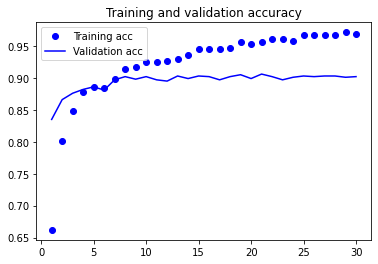

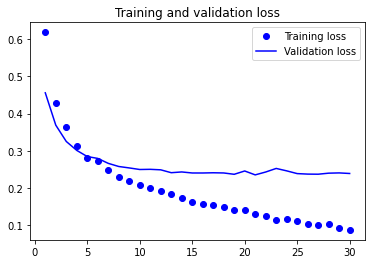

In [18]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# FEATURE EXTRACTION WITH DATA AUGMENTATION 

In [19]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


# **freezing the convolutional base**

In [20]:
print('This is the number of trainable weights '
'before freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30


In [0]:
conv_base.trainable = False

In [22]:
print('This is the number of trainable weights '
'after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights after freezing the conv base: 4


# **Training the model end to end with a frozen convolutional base**

In [0]:
train_datagen = ImageDataGenerator(
                rescale=1./255,
                rotation_range=40,
                width_shift_range=0.2,
                height_shift_range=0.2,
                shear_range=0.2,
                zoom_range=0.2,
                horizontal_flip=True,
                fill_mode='nearest')

In [0]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [25]:
train_generator = train_datagen.flow_from_directory(
                    train_dir,
                    target_size=(150, 150),
                    batch_size=20,
                    class_mode='binary')

Found 2000 images belonging to 2 classes.


In [26]:
validation_generator = test_datagen.flow_from_directory(
                        validation_dir,
                        target_size=(150, 150),
                        batch_size=20,
                        class_mode='binary')


Found 1000 images belonging to 2 classes.


In [27]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])
history = model.fit_generator(
                train_generator,
                steps_per_epoch=100,
                epochs=30,
                validation_data=validation_generator,
                validation_steps=50)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
100/100 [==============================] - 18s 179ms/step - loss: 0.6098 - acc: 0.6705 - val_loss: 0.4631 - val_acc: 0.8260
Epoch 2/30
100/100 [==============================] - 18s 177ms/step - loss: 0.4956 - acc: 0.7720 - val_loss: 0.3828 - val_acc: 0.8590
Epoch 3/30
100/100 [==============================] - 18s 179ms/step - loss: 0.4397 - acc: 0.8080 - val_loss: 0.3371 - val_acc: 0.8790
Epoch 4/30
100/100 [==============================] - 18s 177ms/step - loss: 0.4142 - acc: 0.8245 - val_loss: 0.3163 - val_acc: 0.8740
Epoch 5/30
100/100 [==============================] - 18s 177ms/step - loss: 0.3878 - acc: 0.8260 - val_loss: 0.3007 - val_acc: 0.8710
Epoch 6/30
100/100 [==============================] - 18s 177ms/step - loss: 0.3707 - acc: 0.8385 - val_loss: 0.2926 - val_acc: 0.8760
Epoch 7/30
100/100 [==============================] - 18s 177ms/step - loss: 0.3580 - acc: 0.8490 - val_loss: 0.28

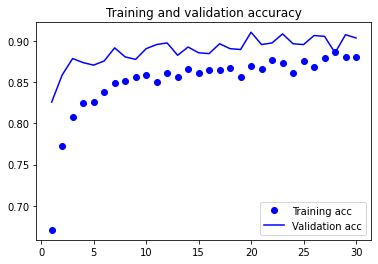

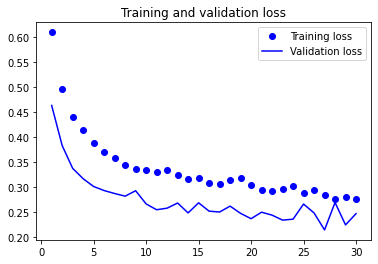

In [28]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [29]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

# **Freezing all layers up to a specific one**

In [0]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [31]:
len(model.trainable_weights)

10

# **Fine-tuning the model**

In [32]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

epochs = 10 # 100
history = model.fit_generator(
                train_generator,
                steps_per_epoch=100,
                epochs=epochs,
                validation_data=validation_generator,
                validation_steps=50)

Epoch 1/10
100/100 [==============================] - 18s 185ms/step - loss: 0.2773 - acc: 0.8865 - val_loss: 0.2096 - val_acc: 0.9150
Epoch 2/10
100/100 [==============================] - 18s 183ms/step - loss: 0.2635 - acc: 0.8925 - val_loss: 0.2414 - val_acc: 0.9010
Epoch 3/10
100/100 [==============================] - 18s 181ms/step - loss: 0.2474 - acc: 0.8885 - val_loss: 0.1762 - val_acc: 0.9360
Epoch 4/10
100/100 [==============================] - 18s 185ms/step - loss: 0.2193 - acc: 0.9135 - val_loss: 0.2038 - val_acc: 0.9230
Epoch 5/10
100/100 [==============================] - 18s 182ms/step - loss: 0.2020 - acc: 0.9095 - val_loss: 0.2017 - val_acc: 0.9300
Epoch 6/10
100/100 [==============================] - 18s 180ms/step - loss: 0.1970 - acc: 0.9155 - val_loss: 0.2049 - val_acc: 0.9140
Epoch 7/10
100/100 [==============================] - 18s 182ms/step - loss: 0.1902 - acc: 0.9230 - val_loss: 0.1952 - val_acc: 0.9270
Epoch 8/10
100/100 [==============================] - 1

In [0]:
modelStoragePath = "drive/My Drive/"
model.save('cats_and_dogs_small_3.h5')

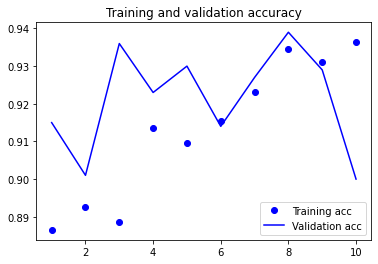

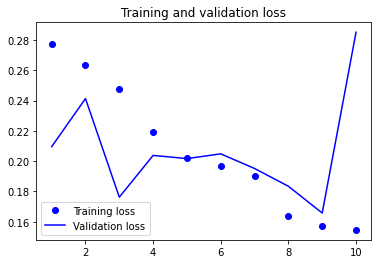

In [34]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

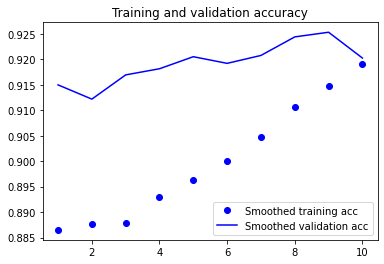

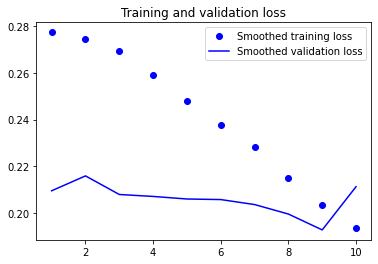

In [38]:
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

plt.plot(epochs,
         smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,
         smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# **Evaluation**

In [39]:
test_generator = test_datagen.flow_from_directory(
                    test_dir,
                    target_size=(150, 150),
                    batch_size=20,
                    class_mode='binary')

Found 1000 images belonging to 2 classes.


In [40]:
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

test acc: 0.902999997138977
